C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


第一食堂,第二食堂, 第三食堂, 第四食堂, 第五食堂的就餐人次分别为： [48216, 115373, 41053, 55631, 92283]
Dept
第一食堂    12884
第三食堂      539
第二食堂    41781
第五食堂    27407
第四食堂      124
Name: hour, dtype: int64 Dept
第四食堂      124
第三食堂      539
第一食堂    12884
第五食堂    27407
第二食堂    41781
Name: hour, dtype: int64 Dept
第四食堂    1
第三食堂    2
第一食堂    3
第五食堂    4
第二食堂    5
Name: hour, dtype: int64


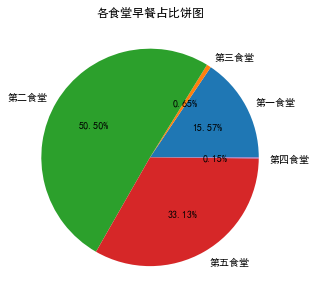

Dept
第一食堂    17387
第三食堂    22358
第二食堂    34987
第五食堂    33945
第四食堂    28756
Name: hour, dtype: int64 Dept
第一食堂    17387
第三食堂    22358
第四食堂    28756
第五食堂    33945
第二食堂    34987
Name: hour, dtype: int64 Dept
第一食堂    1
第三食堂    2
第四食堂    3
第五食堂    4
第二食堂    5
Name: hour, dtype: int64


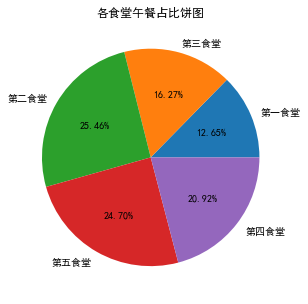

Dept
第一食堂    12474
第三食堂    16977
第二食堂    29773
第五食堂    26673
第四食堂    24921
Name: hour, dtype: int64 Dept
第一食堂    12474
第三食堂    16977
第四食堂    24921
第五食堂    26673
第二食堂    29773
Name: hour, dtype: int64 Dept
第一食堂    1
第三食堂    2
第四食堂    3
第五食堂    4
第二食堂    5
Name: hour, dtype: int64


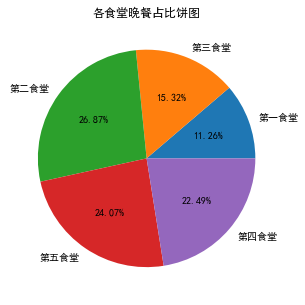

In [2]:
#task2-1
import numpy as np
import pandas as pd
data2=pd.read_csv(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务1\task1_X2.csv',encoding='utf8')      #读取消费记录表
index=['第一食堂','第三食堂', '第二食堂', '第五食堂', '第四食堂']
data2= data2.loc[data2['Dept'].isin(index)]      #筛选出地点是食堂的记录
#print(data2)
d1= data2.loc[data2['Dept'].isin(['第一食堂'])]  
d2= data2.loc[data2['Dept'].isin(['第二食堂'])]  
d3= data2.loc[data2['Dept'].isin(['第三食堂'])]  
d4= data2.loc[data2['Dept'].isin(['第四食堂'])]  
d5= data2.loc[data2['Dept'].isin(['第五食堂'])]  

g=[];h=[];s=pd.DataFrame()
for j in [d1,d2,d3,d4,d5]:
    j['Date']=pd.to_datetime(j['Date'])   ##将字符串时间转换为标准时间类型
    dif=j['Date'].diff()  #对Date列做差分，即将Date列每两行数据做差
    dif=dif.reset_index()     #将索引按从0 开始排列; 括号内没有drop=True，则原索引会保留为新一列，列名为index；dif=dif.reset_index(drop=True)表示删除原索引，并从0开始为索引赋值 
    dif.drop([0],inplace=True)  #删除索引为0的整行;默认为inplace=False
    #注意：此后的dif比Date列的行数少1
    #print(dif)
    cardno=j['CardNo'].diff()
    cardno=cardno.reset_index()     #将索引按从0 开始排列
    cardno.drop([0],inplace=True)  #删除索引为0的整行;默认为inplace=False
    #注意：此后的cardno比CardNo列的行数少1
    day=dif['Date'].astype('timedelta64[D]').astype(int)  # 提取做差后的数据以天数显示
    hour=dif['Date'].astype('timedelta64[h]').astype(int)  # 提取做差后的数据以小时数显示
    minute=dif['Date'].astype('timedelta64[m]').astype(int)  # 提取做差后的数据分钟数显示
#     print(dif)
    
    m=pd.DataFrame()
    m['index']=dif['index']
    m['cardno']=cardno['CardNo'].apply(lambda x:x==0)
#     m['day']=day.apply(lambda x:x==0)
#     m['hour']=hour.apply(lambda x:x==0)
    m['minute']=minute.apply(lambda x:-10<=x<=10)
        #m=m.apply(lambda x,y,z,k:x==0 and y==0 and z==0 and 0<k<10 )
    #print(m)

    t=len(j)
    #print(t)   #j的行数
    #print(m['hour'].iloc[4])   #hour列的第4行数据
    m=m.reset_index()    #将索引按从0 开始排列; 同时原索引会保留为新一列，列名为index
#     print(minute)
    y=[]
    for i in range(len(m)):
        if  m['minute'].iloc[i]==True and m['cardno'].iloc[i]==True:
            t=t-1                     #计算就餐人次
            y.append(m['index'].iloc[i])               #收集满足if条件的索引号
    g.append(t)
   # print(y)
    j.drop(y,inplace=True)#删除索引为y的整行;默认为inplace=False
    #print(j)             #j为各食堂需删去索引后的数据（即删去重复的就餐人次后的数据）
    s=pd.concat([s, j], axis=0)    #默认axis=0为纵向堆叠
    #print(s)
    h.append(y)
#print(h)
#print(s)      #s为各食堂剔除重复的就餐人次后的数据表
print('第一食堂,第二食堂, 第三食堂, 第四食堂, 第五食堂的就餐人次分别为：' ,g)

s['Date']=pd.to_datetime(s['Date'])   ##将字符串时间转换为标准时间类型
s['hour'] = s['Date'].dt.hour  # 提取小时，并取为新增的一列
#print(s)
a=s['hour'].drop_duplicates()    #取出各个小时
#print(a)
#print(sorted(a)) #将数据进行排序，根据该数据，将6-10划分为早餐时间，11-13划分为午餐时间，16-19划分为早餐时间
index1=[6, 7, 8, 9]
index2=[11,12,13]
index3=[16,17,18,19]
s1= s.loc[s['hour'].isin(index1)]      #取出早餐就餐时间（6-9）的数据
s2= s.loc[s['hour'].isin(index2)]      #取出午餐就餐时间（11-13）的数据
s3= s.loc[s['hour'].isin(index3)]      #取出晚餐就餐时间（16-19）的数据
#print(s1)

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号
q=['早餐','午餐','晚餐']
for j, i in enumerate([s1,s2,s3]):
    y = i['hour'].groupby(i['Dept']).count()
    x=y.index   #y的索引为各个食堂
    u=y.sort_values()
    print(y,u,u.argsort()+1)
    #print(x)    #y['hour'].iloc[i]     #食堂i对应的早/中/晚餐就餐人次
    #绘制早中晚餐各食堂占比饼图
    fig=plt.figure(figsize=(6,5))
    plt.pie(y,labels=x,autopct='%.2f%%')    #保留两位小数
    plt.title('各食堂%s占比饼图'%(q[j]))
    plt.show()
      